/Users/fadikatrina/sandbox/uni_data_analysis/env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[22:58:43] WARNING: /Users/runner/work/xgboost/xgboost/src/data/data.cc:759: No format parameter is provided in input uri.  Choosing default parser in dmlc-core.  Consider providing a uri parameter like: filename?format=csv


XGBoostError: [22:58:43] /Users/runner/work/xgboost/xgboost/src/data/data.cc:765: Encountered parser error:
[22:58:43] /Users/runner/work/xgboost/xgboost/dmlc-core/src/data/./row_block.h:177: Check failed: offset.back() == value.size() || value.size() == 0: 
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001284a34a4 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x000000012865745b dmlc::data::RowBlockContainer<unsigned int, float>::GetBlock() const + 683
  [bt] (2) 3   libxgboost.dylib                    0x00000001286705a7 dmlc::data::ThreadedParser<unsigned int, float>::Next() + 215
  [bt] (3) 4   libxgboost.dylib                    0x00000001284f94b7 xgboost::data::FileAdapter::Next() + 23
  [bt] (4) 5   libxgboost.dylib                    0x000000012850d0f0 xgboost::data::SimpleDMatrix::SimpleDMatrix<xgboost::data::FileAdapter>(xgboost::data::FileAdapter*, float, int) + 368
  [bt] (5) 6   libxgboost.dylib                    0x00000001284f5349 xgboost::DMatrix::Load(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, bool, bool, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&) + 2521
  [bt] (6) 7   libxgboost.dylib                    0x0000000128491cfc XGDMatrixCreateFromFile + 316
  [bt] (7) 8   libffi.dylib                        0x00007fff2dda28f5 ffi_call_unix64 + 85
  [bt] (8) 9   ???                                 0x00007ffeeabf0e30 0x0 + 140732836810288


Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001284a34a4 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x00000001284f5d46 xgboost::DMatrix::Load(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, bool, bool, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&) + 5078
  [bt] (2) 3   libxgboost.dylib                    0x0000000128491cfc XGDMatrixCreateFromFile + 316
  [bt] (3) 4   libffi.dylib                        0x00007fff2dda28f5 ffi_call_unix64 + 85
  [bt] (4) 5   ???                                 0x00007ffeeabf0e30 0x0 + 140732836810288



In [67]:
#labels =["Survived", "Perished"]
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

x = pd.read_csv("./classification_data.txt")
x = x.fillna(0)

def splitData():
    labels = x["winner"].values
    predictors = x.drop('winner', 1).values

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(predictors, labels, random_state=1, test_size=0.2)
    return XTrain, XTest, yTrain, yTest

In [68]:
from IPython.display import Image, display
import pydotplus
from scipy import misc


def renderTree(my_tree):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree,
                                 out_file=f,
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)
    display(Image(filename=image_name))

/var/folders/10/t7y66j2142q2qgg2_4hbsyrh0000gn/T/ipykernel_59468/1453622611.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  predictors = x.drop('winner', 1).values


Accuracy on training data=  1.0
Accuracy on test data=  0.3333333333333333


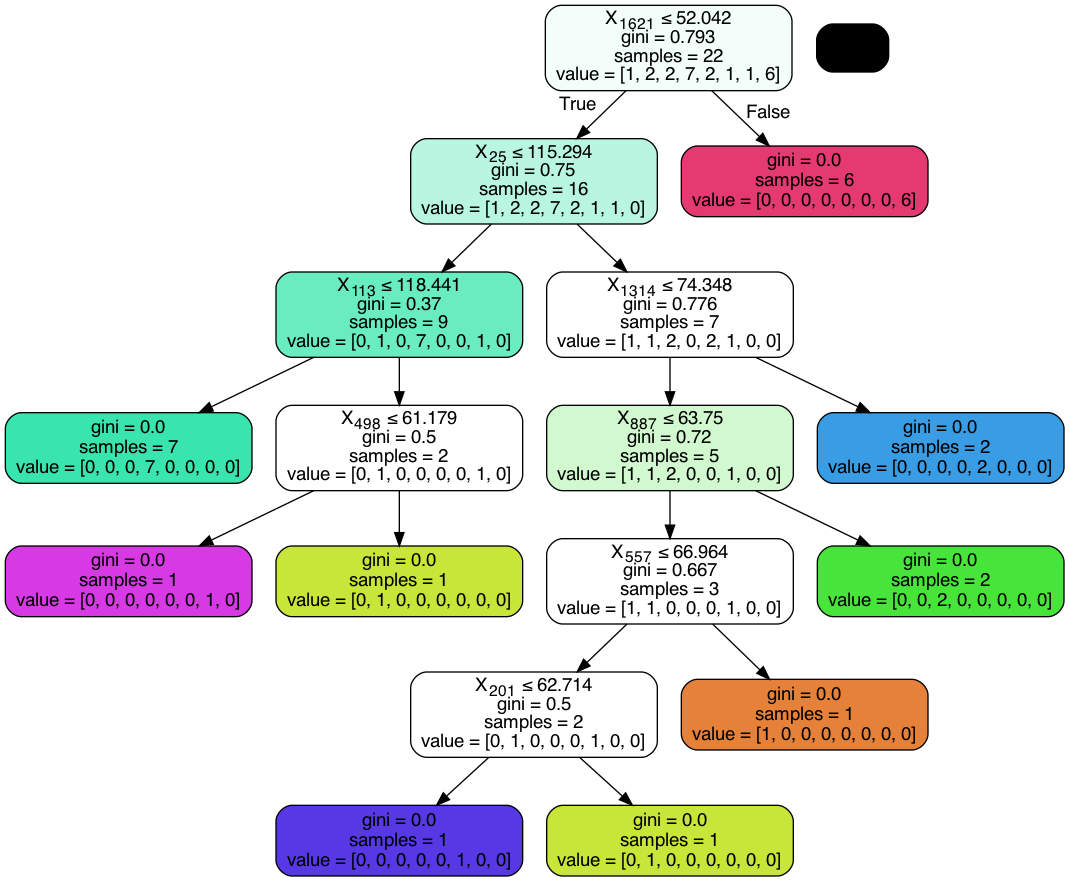

In [74]:
XTrain, XTest, yTrain, yTest = splitData()
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree)

In [75]:
import xgboost as xgb
import pandas as pd

# read in data
dtrain = xgb.DMatrix("classification_data.txt")
dtest = xgb.DMatrix("classification_data.txt")
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'objective':'rank:map' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
preds

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5], dtype=float32)

In [78]:
from sklearn.ensemble import RandomForestClassifier

forest =  RandomForestClassifier(bootstrap=True, max_features=2, n_estimators=100, random_state=0)
XTrain, XTest, yTrain, yTest = splitData()

trained_forest = forest.fit(XTrain, yTrain)

y_pred_train = trained_forest.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = trained_forest.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

/var/folders/10/t7y66j2142q2qgg2_4hbsyrh0000gn/T/ipykernel_59468/1453622611.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  predictors = x.drop('winner', 1).values


Accuracy on training data=  1.0
Accuracy on test data=  0.8333333333333334


In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
XTrain, XTest, yTrain, yTest = splitData()

clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
clf.fit(XTrain, yTrain)
AdaBoostClassifier(n_estimators=100, random_state=0)

#clf.predict([[0, 0, 0, 0]])
#array([1])
print('Accuracy on training data= ', clf.score(XTrain, yTrain))
print('Accuracy on testing data= ', clf.score(XTest, yTest))

Accuracy on training data=  1.0
Accuracy on testing data=  0.3333333333333333


/var/folders/10/t7y66j2142q2qgg2_4hbsyrh0000gn/T/ipykernel_59468/569220719.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  predictors = x.drop('winner', 1).values


In [66]:
from xgboost import XGBClassifier

# fit model on training data
model = XGBClassifier(use_label_encoder=False)
model.fit(XTrain, yTrain)

print(model)

out1=model.predict(XTrain)
outputs= [round(value) for value in out1]


y_pred = model.predict(XTest)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = metrics.accuracy_score(yTest, predictions)
print("\nAccuracy on training data: %.2f%%" % (metrics.accuracy_score(yTrain,outputs) * 100.0))
print("Accuracy on testing data: %.2f%%" % (accuracy * 100.0))

ValueError: The label must consist of integer labels of form 0, 1, 2, ..., [num_class - 1].